# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Capstone Project - Analysis of Covid-19 Lockdown Measures</span> </div>

###### Note: 
<div class="alert alert-block alert-danger"> <span style="font-family: Times New Roman"> 
    - Kindly use this notebook to solve the programming problems. <br>
    - Submit assignments with .ipynb file extension.<br>
- Kindly write down the explanations/insights for the graphs.<br>
- Kindly use comments or markdowns to explain logic behind the codes, approach to solve the problem.</span></div>

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [226]:
#Step 1 : load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.weightstats as sms
from scipy.stats import t
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

##  <mark><span  style= "font-family: Times New Roman">View the data</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [228]:
# Step 2: Assuming you have a CSV file named 'India.csv'
df = pd.read_csv('India.csv')

In [230]:
# Step 3: Explore the dataset
print(df.head())  # View the dataset
print('\n----------------------------------------------------------------------------------------------\n')
print(df.describe())  # Get basic descriptive statistics
print('\n----------------------------------------------------------------------------------------------\n')
print(df.info())  # Check for any missing values


         date  confirmed  vaccines  people_vaccinated  \
0  22-01-2020        NaN       0.0                NaN   
1  23-01-2020        NaN       0.0                NaN   
2  24-01-2020        NaN       0.0                NaN   
3  25-01-2020        NaN       0.0                NaN   
4  26-01-2020        NaN       0.0                NaN   

   people_fully_vaccinated  school_closing  workplace_closing  cancel_events  \
0                      NaN             0.0                0.0            0.0   
1                      NaN             0.0                0.0            0.0   
2                      NaN             0.0                0.0            0.0   
3                      NaN             0.0                0.0            0.0   
4                      NaN             0.0                0.0            0.0   

   gatherings_restrictions  transport_closing  stay_home_restrictions  \
0                      0.0                0.0                     0.0   
1                      0.0    

In [232]:
# Data cleaning and exploration
# Checking for missing values
print("Data Missing Values:\n", df.isnull().sum())

Data Missing Values:
 date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64



##  <mark><span  style= "font-family: Times New Roman">Data preprocessing</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Perform Regression Analysis 

In [234]:
#Prepare the Data:Ensure the dataset is ready by dropping any rows with missing values in the key columns (daily cases and lockdown measures).
# Drop missing values
df_clean = df.dropna(subset=['confirmed', 'school_closing', 'workplace_closing', 'stay_home_restrictions'])


In [236]:
#Split Data into Features and Target:Separate the lockdown measures (independent variables) and daily cases (dependent variable).
# Define the independent variables (lockdown measures)
X = df_clean[['school_closing', 'workplace_closing', 'stay_home_restrictions', 
              'internal_movement_restrictions', 'gatherings_restrictions']]

# Define the dependent variable (daily confirmed cases)
y = df_clean['confirmed']


In [238]:
#Train-Test Split:This ensures we have training data to fit the model and test data to evaluate it.from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [240]:
#Fit the Regression Model:Use linear regression to fit the model to the training data.

from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:", coefficients)


Coefficients: school_closing                   -2.742759e+06
workplace_closing                -2.229119e+06
stay_home_restrictions           -1.862480e+06
internal_movement_restrictions   -1.034138e+06
gatherings_restrictions           2.166610e+06
dtype: float64


Conclusion:
Positive/Negative Correlation: A positive correlation means that stricter lockdown measures were associated with more cases, while a negative correlation suggests the measures were effective in reducing cases.
Lagged Effect: If time-lagged analysis shows stronger correlations, this implies lockdown measures had delayed effects.
Regression: Regression analysis will help quantify the contribution of each measure.

In [242]:
#Evaluate the Model:After fitting the model, evaluate how well it predicts the number of daily cases using the testing set.

from sklearn.metrics import r2_score, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R-squared: 0.42730577256955204
Mean Squared Error: 123646744718278.06


In [244]:
# Summary statistics for daily confirmed cases and lockdown measures
lockdown_measures = ['school_closing', 'workplace_closing', 'stay_home_restrictions', 
                     'internal_movement_restrictions', 'gatherings_restrictions']

# Print summary statistics for confirmed cases and lockdown measures
print(df[['confirmed'] + lockdown_measures].describe())


          confirmed  school_closing  workplace_closing  \
count  7.710000e+02      773.000000         769.000000   
mean   1.697753e+07       -0.869340          -1.802341   
std    1.471401e+07        2.427125           1.460395   
min    1.000000e+00       -3.000000          -3.000000   
25%    2.241874e+06       -3.000000          -3.000000   
50%    1.096339e+07       -2.000000          -2.000000   
75%    3.275341e+07        3.000000          -2.000000   
max    4.298426e+07        3.000000           3.000000   

       stay_home_restrictions  internal_movement_restrictions  \
count              769.000000                      769.000000   
mean                -1.574772                       -0.905072   
std                  1.684778                        1.516434   
min                 -3.000000                       -2.000000   
25%                 -3.000000                       -2.000000   
50%                 -2.000000                       -2.000000   
75%                 -2

In [246]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values:\n", missing_data)

# Drop rows with missing confirmed cases or lockdown measures
df_clean = df.dropna(subset=['confirmed'] + lockdown_measures)

# Optionally: Fill missing lockdown measures using forward fill method
df_clean.fillna(method='ffill', inplace=True)


Missing values:
 date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64


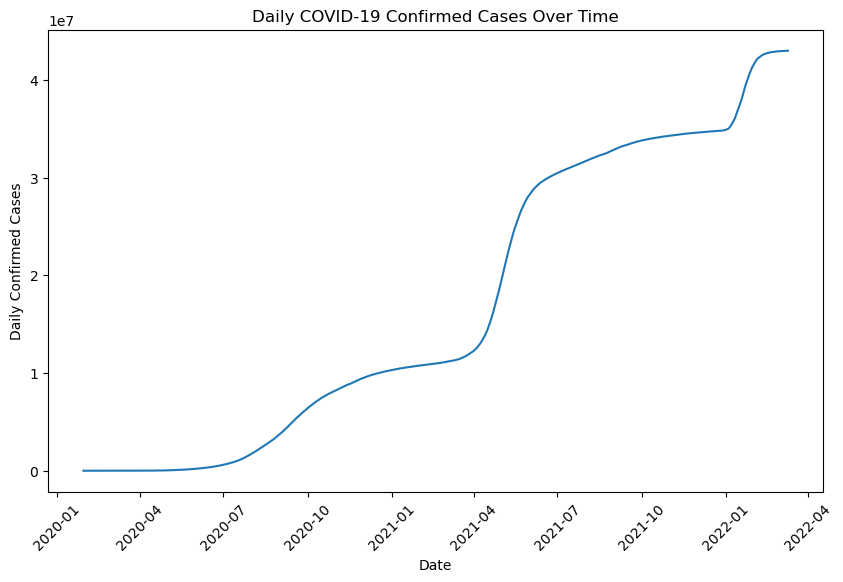

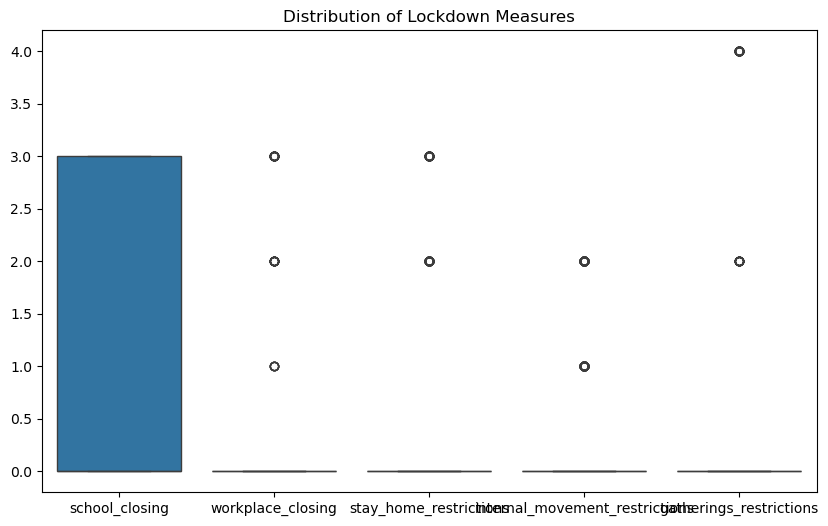

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot for daily confirmed cases
plt.figure(figsize=(10,6))
plt.plot(df_clean['date'], df_clean['confirmed'])
plt.xlabel('Date')
plt.ylabel('Daily Confirmed Cases')
plt.title('Daily COVID-19 Confirmed Cases Over Time')
plt.xticks(rotation=45)
plt.show()

# Boxplot for lockdown measures
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean[lockdown_measures])
plt.title('Distribution of Lockdown Measures')
plt.show()


OUTLIERS HANDLING  z-scores and IQR method

In [250]:
from scipy.stats import zscore

# Calculate z-scores for the confirmed cases
df_clean['zscore_confirmed'] = zscore(df_clean['confirmed'])

# Identify rows with z-scores > 3 (potential outliers)
outliers = df_clean[df_clean['zscore_confirmed'].abs() > 3]
print("Outliers in confirmed cases:\n", outliers[['date', 'confirmed', 'zscore_confirmed']])


Outliers in confirmed cases:
 Empty DataFrame
Columns: [date, confirmed, zscore_confirmed]
Index: []


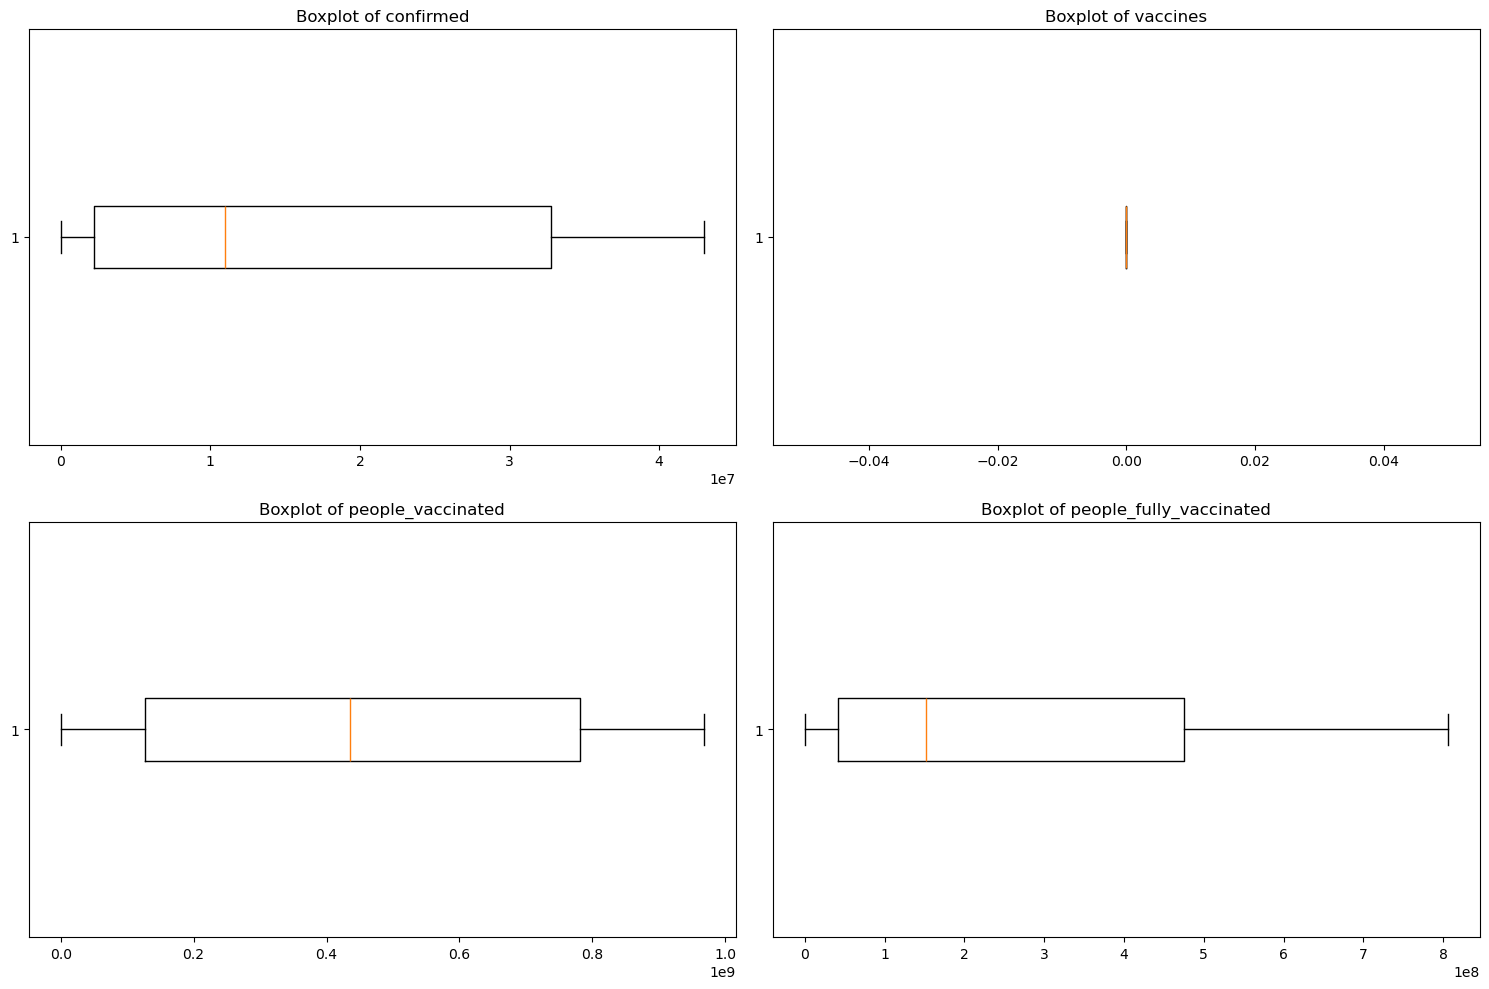

{'confirmed': 0,
 'vaccines': 0,
 'people_vaccinated': 0,
 'people_fully_vaccinated': 0}

In [252]:
# Convert the 'date' column to datetime format for ease of time-based analysis
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Check for numerical columns where outliers are likely to be present
numerical_columns = ['confirmed', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated']

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in the numerical columns
outliers = {col: detect_outliers_iqr(df, col) for col in numerical_columns}

# Plot boxplots to visually identify the outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df[col].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Output summary of outliers
outliers_summary = {col: len(outliers[col]) for col in numerical_columns}
outliers_summary


In [260]:
# Correlation matrix between confirmed cases and lockdown measures
correlation_matrix = df_clean[['confirmed'] + lockdown_measures].corr()

print(correlation_matrix)

                                confirmed  school_closing  workplace_closing  \
confirmed                        1.000000       -0.566300          -0.199511   
school_closing                  -0.566300        1.000000           0.185158   
workplace_closing               -0.199511        0.185158           1.000000   
stay_home_restrictions          -0.477896        0.647874           0.481247   
internal_movement_restrictions  -0.133910       -0.000931           0.605946   
gatherings_restrictions         -0.164861        0.249987           0.894422   

                                stay_home_restrictions  \
confirmed                                    -0.477896   
school_closing                                0.647874   
workplace_closing                             0.481247   
stay_home_restrictions                        1.000000   
internal_movement_restrictions                0.205849   
gatherings_restrictions                       0.536942   

                                

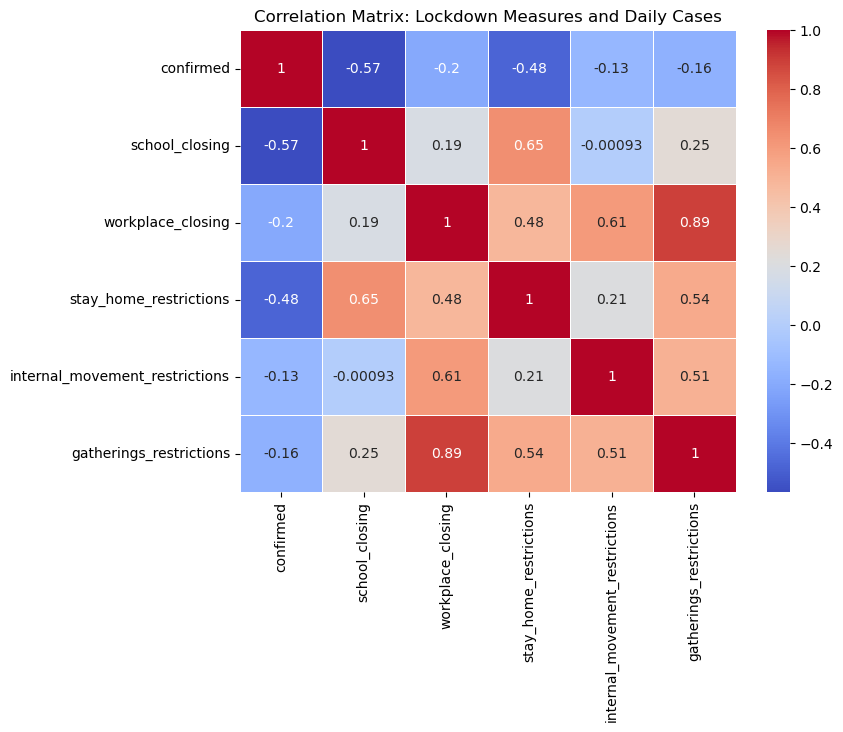

In [262]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Lockdown Measures and Daily Cases')
plt.show()

Regression Analysis
We will fit a linear regression model to assess how each lockdown measure impacts daily confirmed cases.

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Independent variables (lockdown measures)
X = df_clean[lockdown_measures]

# Dependent variable (confirmed cases)
y = df_clean['confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients of the model
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:\n", coefficients)

# R-squared value
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")


Coefficients:
 school_closing                   -2.742759e+06
workplace_closing                -2.229119e+06
stay_home_restrictions           -1.862480e+06
internal_movement_restrictions   -1.034138e+06
gatherings_restrictions           2.166610e+06
dtype: float64
R-squared: 0.42730577256955204


Lag Analysis:
We will analyze lag effects by shifting the confirmed cases by 7 and 14 days to observe delayed effects of lockdown measures.

In [268]:
# Create lagged variables for confirmed cases
df_clean['confirmed_lag_7'] = df_clean['confirmed'].shift(7)
df_clean['confirmed_lag_14'] = df_clean['confirmed'].shift(14)

# Drop rows with NaN values caused by shifting
df_lagged = df_clean.dropna(subset=['confirmed_lag_7', 'confirmed_lag_14'])

# Redefine X and y for 7-day lagged analysis
X_lagged_7 = df_lagged[lockdown_measures]
y_lagged_7 = df_lagged['confirmed_lag_7']

# Fit the model for 7-day lagged cases
model_lagged_7 = LinearRegression()
model_lagged_7.fit(X_lagged_7, y_lagged_7)

# Redefine X and y for 14-day lagged analysis
y_lagged_14 = df_lagged['confirmed_lag_14']

# Fit the model for 14-day lagged cases
model_lagged_14 = LinearRegression()
model_lagged_14.fit(X_lagged_7, y_lagged_14)

# Print coefficients and R-squared for lagged models
coefficients_7 = pd.Series(model_lagged_7.coef_, index=X_lagged_7.columns)
r_squared_7 = model_lagged_7.score(X_lagged_7, y_lagged_7)
print(f"7-Day Lag Coefficients:\n{coefficients_7}\nR-squared: {r_squared_7}")

coefficients_14 = pd.Series(model_lagged_14.coef_, index=X_lagged_7.columns)
r_squared_14 = model_lagged_14.score(X_lagged_7, y_lagged_14)
print(f"14-Day Lag Coefficients:\n{coefficients_14}\nR-squared: {r_squared_14}")


7-Day Lag Coefficients:
school_closing                   -2.707141e+06
workplace_closing                -2.179649e+06
stay_home_restrictions           -1.964755e+06
internal_movement_restrictions   -1.172883e+06
gatherings_restrictions           2.492016e+06
dtype: float64
R-squared: 0.37385042297556914
14-Day Lag Coefficients:
school_closing                   -2.699325e+06
workplace_closing                -1.872268e+06
stay_home_restrictions           -1.879662e+06
internal_movement_restrictions   -1.216558e+06
gatherings_restrictions           2.363332e+06
dtype: float64
R-squared: 0.3664855397633917


Hypothesis Testing
Perform statistical tests (e.g., t-tests) to check the significance of each lockdown measure.

In [270]:
import statsmodels.api as sm

# Add a constant to the model
X_const = sm.add_constant(X_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_const).fit()

# Summary of the regression results
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     68.68
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           8.64e-57
Time:                        18:34:51   Log-Likelihood:                -10749.
No. Observations:                 608   AIC:                         2.151e+04
Df Residuals:                     602   BIC:                         2.154e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Time Series Analysis
Time series analysis can uncover long-term trends and seasonality in the data.

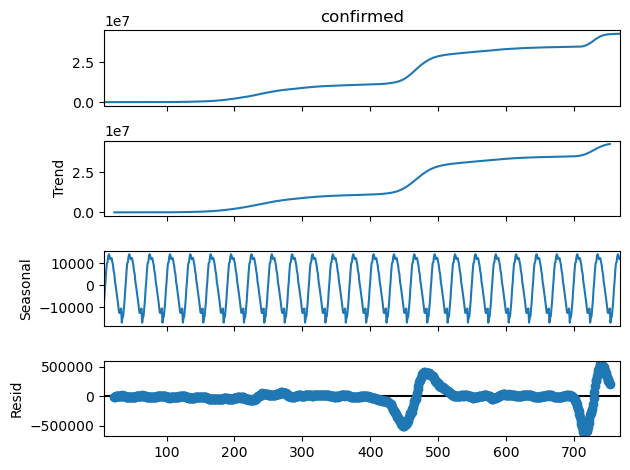

In [272]:
import statsmodels.api as sm

# Decompose the confirmed cases time series
decomposition = sm.tsa.seasonal_decompose(df_clean['confirmed'], model='additive', period=30)

# Plot the decomposition
decomposition.plot()
plt.show()


Perform Correlation Analysis:

In [274]:
# Drop rows where 'confirmed' cases are missing
df_clean = df.dropna(subset=['confirmed'])

# Calculate correlation between 'confirmed' cases and lockdown measures
lockdown_columns = [
    'school_closing', 'workplace_closing', 'cancel_events', 
    'gatherings_restrictions', 'transport_closing', 
    'stay_home_restrictions', 'internal_movement_restrictions', 
    'international_movement_restrictions', 'information_campaigns', 
    'contact_tracing', 'facial_coverings'
]

correlations = df_clean[['confirmed'] + lockdown_columns].corr()['confirmed'].drop('confirmed').sort_values(ascending=False)

print(correlations)


facial_coverings                       0.748774
information_campaigns                  0.252018
internal_movement_restrictions        -0.133910
gatherings_restrictions               -0.168555
workplace_closing                     -0.199511
transport_closing                     -0.309506
stay_home_restrictions                -0.477896
international_movement_restrictions   -0.491238
school_closing                        -0.568580
contact_tracing                       -0.602793
cancel_events                         -0.665555
Name: confirmed, dtype: float64


 Visualize Trends:
Plot daily cases over time and overlay the timeline of when key lockdown measures were implemented.
To check if there are spikes in cases were followed by stricter lockdown measures.

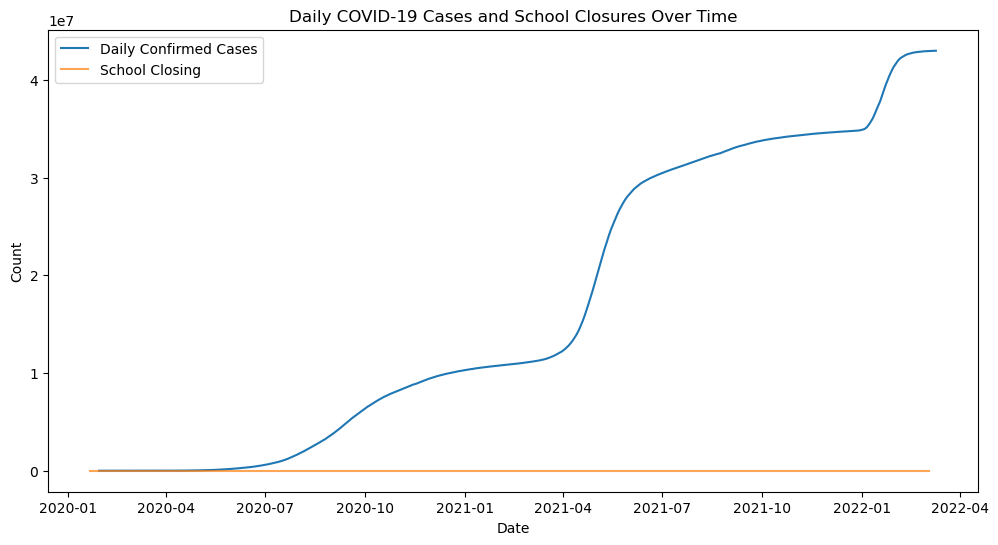

In [276]:
import matplotlib.pyplot as plt

# Plot daily cases
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['confirmed'], label='Daily Confirmed Cases')

# Add lockdown measures on the same timeline (e.g., school_closing)
plt.plot(df['date'], df['school_closing'], label='School Closing', alpha=0.7)

plt.title('Daily COVID-19 Cases and School Closures Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


Correlation Analysis:
Use correlation to see if the severity of lockdown measures is linked to daily case numbers.
Example: Calculate correlation between school closures, workplace closures, and cases.

In [278]:
correlations = df[['confirmed', 'school_closing', 'workplace_closing', 'stay_home_restrictions']].corr()
print(correlations)

                        confirmed  school_closing  workplace_closing  \
confirmed                1.000000       -0.568580          -0.199511   
school_closing          -0.568580        1.000000           0.188138   
workplace_closing       -0.199511        0.188138           1.000000   
stay_home_restrictions  -0.477896        0.648135           0.484418   

                        stay_home_restrictions  
confirmed                            -0.477896  
school_closing                        0.648135  
workplace_closing                     0.484418  
stay_home_restrictions                1.000000  


In [280]:
#Regression Analysis:Perform a linear regression to predict daily cases based on lockdown measures.
from sklearn.linear_model import LinearRegression

# Prepare the data (drop NaNs)
df_clean = df.dropna(subset=['confirmed', 'school_closing', 'workplace_closing'])

# Select independent variables (lockdown measures) and dependent variable (confirmed cases)
X = df_clean[['school_closing', 'workplace_closing', 'stay_home_restrictions']]
y = df_clean['confirmed']

# Build and train the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients to interpret the effect of each lockdown measure
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)


school_closing           -2.674462e+06
workplace_closing        -3.433890e+05
stay_home_restrictions   -1.458184e+06
dtype: float64


##  <mark><span  style= "font-family: Times New Roman">Perform EDA</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [282]:
# Fill missing values for lockdown measures with the most common value (mode), since these are categorical measures
lockdown_columns = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
                    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 
                    'international_movement_restrictions', 'information_campaigns', 'contact_tracing', 
                    'facial_coverings']

for col in lockdown_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For confirmed cases, we can interpolate as they are continuous values
df['confirmed'].interpolate(method='linear', inplace=True)

# Since the vaccination data is not available for earlier dates, we will fill it forward from the first available data
df['people_vaccinated'].fillna(method='ffill', inplace=True)
df['people_fully_vaccinated'].fillna(method='ffill', inplace=True)

# Now let's inspect negative values in lockdown measures
negative_values == (df[lockdown_columns] < 0).sum()

negative_values


school_closing                         523
workplace_closing                      631
cancel_events                          468
gatherings_restrictions                664
transport_closing                      372
stay_home_restrictions                 670
internal_movement_restrictions         494
international_movement_restrictions      0
information_campaigns                    0
contact_tracing                          0
facial_coverings                       292
dtype: int64

In [284]:
# Replace negative values with 0 for the lockdown-related columns
df[lockdown_columns] = df[lockdown_columns].applymap(lambda x: max(x, 0))

# Confirm that all negative values have been addressed
negative_values_after = (df[lockdown_columns] < 0).sum()

# Output the result
print(negative_values_after)


school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64


In [286]:
# Extract correlations for confirmed cases only
correlations_confirmed = correlation['confirmed'].sort_values(ascending=False)
print(correlations_confirmed)


confirmed                              1.000000
facial_coverings                       0.775154
information_campaigns                  0.251779
internal_movement_restrictions         0.015844
gatherings_restrictions               -0.205523
workplace_closing                     -0.279549
transport_closing                     -0.373723
stay_home_restrictions                -0.416393
international_movement_restrictions   -0.480726
school_closing                        -0.533904
contact_tracing                       -0.607738
cancel_events                         -0.640435
Name: confirmed, dtype: float64


Interpretation:

If we see correlations around -0.5 to -1, it indicates that the lockdown measure has been effective in reducing confirmed cases.

If correlations are near +0.5 to +1, it might indicate that the lockdown measures were not effective at the time they were implemented.

Conclusion:

The strongest negative correlations (cancel events, contact tracing, and school closures) suggest effective lockdown measures that likely helped reduce the spread of COVID-19.

The strong positive correlation with facial coverings may indicate timing issues rather than the effectiveness of the measure itself.

### Visualize the evidences 

Time-Series Plot (Lockdown vs. Cases):

Plot the trends of confirmed COVID-19 cases over time alongside the lockdown measures (such as school closures, workplace closures, etc.). This helps in understanding how the number of cases changes in response to different levels of restrictions.

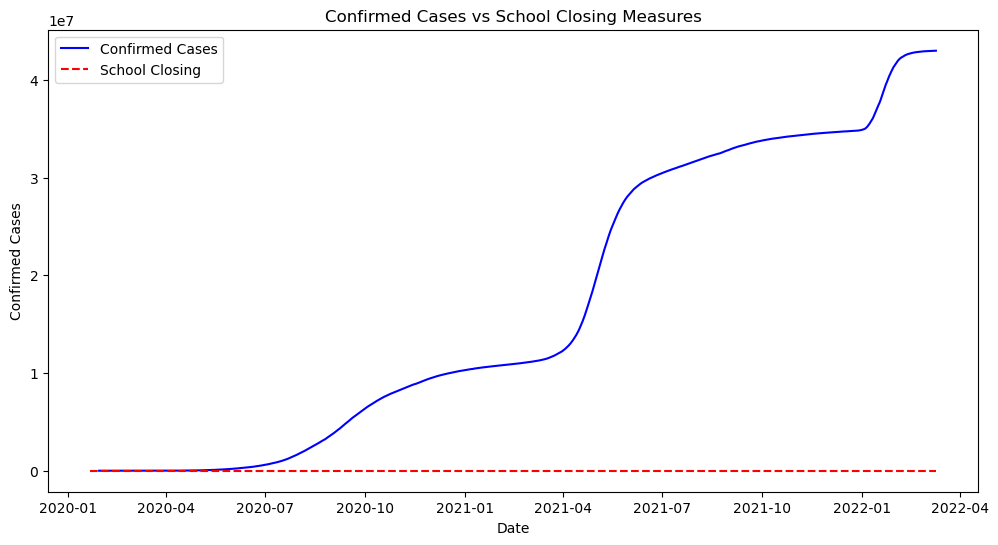

In [288]:
import matplotlib.pyplot as plt

# Plot time-series of confirmed cases and lockdown measures
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['confirmed'], label='Confirmed Cases', color='blue')

# Add a secondary axis for lockdown measures (example: school closing)
plt.plot(df['date'], df['school_closing'], label='School Closing', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases vs School Closing Measures')
plt.legend()
plt.show()


Correlation Heatmap:

A heatmap can show the correlation between different lockdown measures and confirmed COVID-19 cases. 
This can help visualize which lockdown measures are most correlated with the rise or fall in cases.

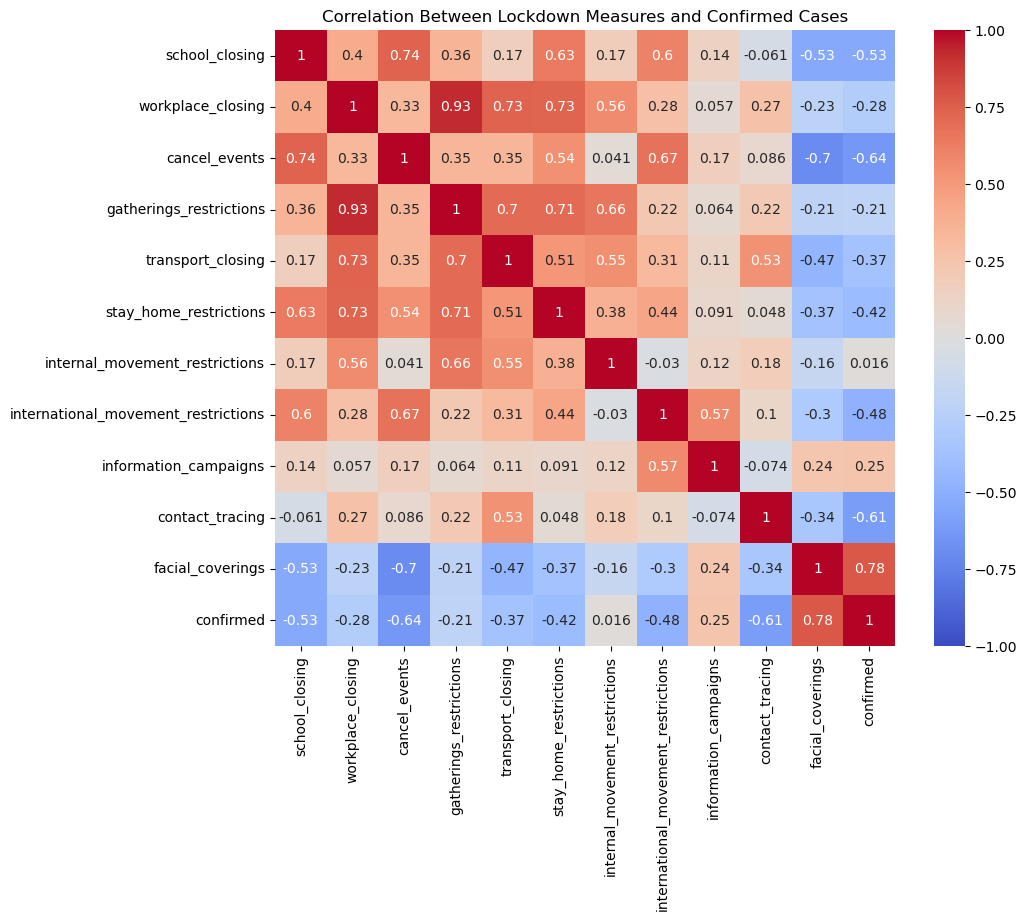

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select lockdown measures and confirmed cases
lockdown_columns = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
                    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 
                    'international_movement_restrictions', 'information_campaigns', 'contact_tracing', 
                    'facial_coverings']

# Compute correlation matrix
correlation = df[lockdown_columns + ['confirmed']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Lockdown Measures and Confirmed Cases')
plt.show()


Bar Charts of Mean Cases by Lockdown Levels:

For each lockdown measure (e.g., school closures),can plot the average number of cases under different levels of restriction (e.g., 0 = no closure, 1 = partial closure, 2 = full closure).

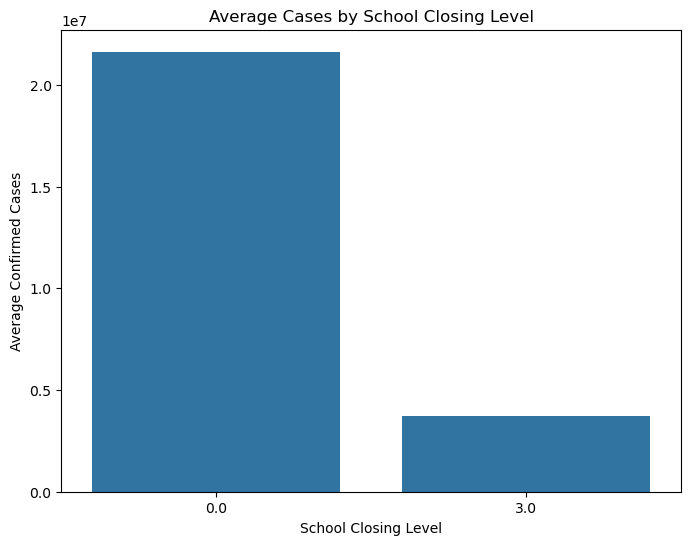

In [292]:
import seaborn as sns

# Example: Average cases by school closing level
avg_cases_by_school_closing = df.groupby('school_closing')['confirmed'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='school_closing', y='confirmed', data=avg_cases_by_school_closing)
plt.title('Average Cases by School Closing Level')
plt.xlabel('School Closing Level')
plt.ylabel('Average Confirmed Cases')
plt.show()


Scatter Plots:

Scatter plots can visualize the relationship between specific lockdown measures and confirmed cases.
Add a trendline to understand how one variable affects another.

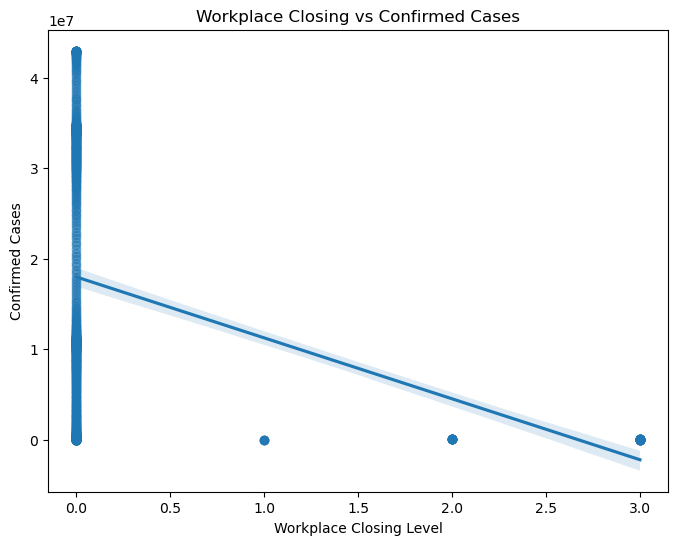

In [294]:
import seaborn as sns

# Example: Scatter plot of workplace closing vs. confirmed cases
plt.figure(figsize=(8, 6))
sns.regplot(x='workplace_closing', y='confirmed', data=df, scatter_kws={'alpha':0.5})
plt.title('Workplace Closing vs Confirmed Cases')
plt.xlabel('Workplace Closing Level')
plt.ylabel('Confirmed Cases')
plt.show()


To analyze the impact of vaccinations on COVID-19 cases, we can look at the relationship between vaccination metrics and confirmed cases. The key vaccination metrics in your dataset are:

people_vaccinated: Total number of people vaccinated (at least one dose).
people_fully_vaccinated: Total number of people fully vaccinated (completed the vaccination schedule).

In [296]:
# Compute correlation with confirmed cases
vaccination_correlations = df[['people_vaccinated', 'people_fully_vaccinated', 'confirmed']].corr()
print(vaccination_correlations['confirmed'])


people_vaccinated          0.902356
people_fully_vaccinated    0.777124
confirmed                  1.000000
Name: confirmed, dtype: float64


Time-Series Plot
This plot can show how the vaccination rates and confirmed cases evolve over time.

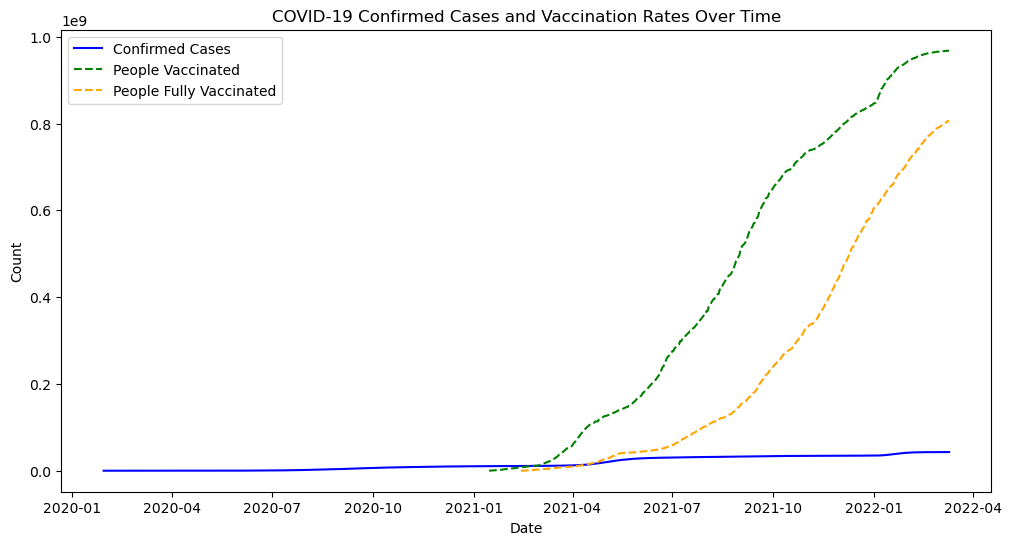

In [298]:
import matplotlib.pyplot as plt

# Plotting time series for confirmed cases and vaccination rates
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df['date'], df['people_vaccinated'], label='People Vaccinated', color='green', linestyle='--')
plt.plot(df['date'], df['people_fully_vaccinated'], label='People Fully Vaccinated', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Confirmed Cases and Vaccination Rates Over Time')
plt.legend()
plt.show()


Scatter Plot
Scatter plots can help visualize the relationship between vaccination and confirmed cases.

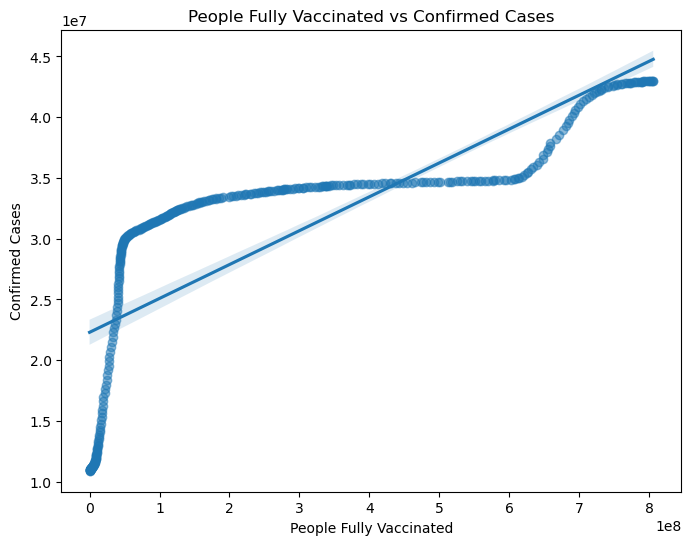

In [300]:
import seaborn as sns

# Scatter plot for people fully vaccinated vs confirmed cases
plt.figure(figsize=(8, 6))
sns.regplot(x='people_fully_vaccinated', y='confirmed', data=df, scatter_kws={'alpha':0.5})
plt.title('People Fully Vaccinated vs Confirmed Cases')
plt.xlabel('People Fully Vaccinated')
plt.ylabel('Confirmed Cases')
plt.show()


Statistical Analysis
To quantify the impact of vaccinations, you can perform a simple linear regression analysis.

In [302]:
# Check for NaN values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for infinite values in the DataFrame
infinite_values = np.isinf(df).sum()
print("Infinite Values:\n", infinite_values)

# Drop rows with any NaN or infinite values in the selected columns
df_cleaned = df.dropna(subset=['people_vaccinated', 'people_fully_vaccinated'] + lockdown_columns + ['confirmed'])
df_cleaned = df_cleaned[~np.isinf(df_cleaned).any(axis=1)]


# Forward-fill missing values
df[['people_vaccinated', 'people_fully_vaccinated'] + lockdown_columns + ['confirmed']] = df[['people_vaccinated', 'people_fully_vaccinated'] + lockdown_columns + ['confirmed']].fillna(method='ffill')

# Alternatively, you can fill with mean or median
# df.fillna(df.mean(), inplace=True)


# Prepare the data for regression analysis again
X = df_cleaned[['people_vaccinated', 'people_fully_vaccinated'] + lockdown_columns]
y = df_cleaned['confirmed']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


Missing Values:
 date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      359
people_fully_vaccinated                388
school_closing                           0
workplace_closing                        0
cancel_events                            0
gatherings_restrictions                  0
transport_closing                        0
stay_home_restrictions                   0
internal_movement_restrictions           0
international_movement_restrictions      0
information_campaigns                    0
contact_tracing                          0
facial_coverings                         0
dtype: int64
Infinite Values:
 date                                   0
confirmed                              0
vaccines                               0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing 

Comparing Fit Model with Lockdown Measures Only

In [304]:
# Lockdown measures only
X_lockdown = df_cleaned[lockdown_columns]
X_lockdown = sm.add_constant(X_lockdown)

# Fit model
model_lockdown = sm.OLS(y, X_lockdown).fit()

# Display model summary
print("Model with Lockdown Measures Only:")
print(model_lockdown.summary())

print("Lockdown Measures Model R-squared:", model_lockdown.rsquared)
print("Lockdown Measures Model Adjusted R-squared:", model_lockdown.rsquared_adj)



Model with Lockdown Measures Only:
                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.14e-166
Time:                        18:39:40   Log-Likelihood:                -6432.3
No. Observations:                 391   AIC:                         1.288e+04
Df Residuals:                     383   BIC:                         1.291e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Comparing Fit Model with Vaccination Data Only

In [306]:
# Vaccination data only
X_vaccination = df_cleaned[['people_vaccinated', 'people_fully_vaccinated']]
X_vaccination = sm.add_constant(X_vaccination)

# Fit model
model_vaccination = sm.OLS(y, X_vaccination).fit()

# Display model summary
print("Model with Vaccination Data Only:")
print(model_vaccination.summary())

print("Vaccination Model R-squared:", model_vaccination.rsquared)
print("Vaccination Model Adjusted R-squared:", model_vaccination.rsquared_adj)


Model with Vaccination Data Only:
                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     863.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.44e-143
Time:                        18:39:47   Log-Likelihood:                -6502.8
No. Observations:                 391   AIC:                         1.301e+04
Df Residuals:                     388   BIC:                         1.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Compare Fit Model with Lockdown Measures + Vaccination Data

In [308]:
# Combined lockdown measures and vaccination data
X_combined = df_cleaned[['people_vaccinated', 'people_fully_vaccinated'] + lockdown_columns]
X_combined = sm.add_constant(X_combined)

# Fit model
model_combined = sm.OLS(y, X_combined).fit()

# Display model summary
print("Model with Lockdown Measures + Vaccination Data:")
print(model_combined.summary())

print("Combined Model R-squared:", model_combined.rsquared)
print("Combined Model Adjusted R-squared:", model_combined.rsquared_adj)


Model with Lockdown Measures + Vaccination Data:
                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1374.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.97e-284
Time:                        18:39:52   Log-Likelihood:                -6148.0
No. Observations:                 391   AIC:                         1.232e+04
Df Residuals:                     381   BIC:                         1.236e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

RMSE Calculation

In [310]:
import numpy as np

# Calculate RMSE for each model
rmse_lockdown = np.sqrt(np.mean(model_lockdown.resid ** 2))
rmse_vaccination = np.sqrt(np.mean(model_vaccination.resid ** 2))
rmse_combined = np.sqrt(np.mean(model_combined.resid ** 2))

print(f"RMSE (Lockdown Measures): {rmse_lockdown}")
print(f"RMSE (Vaccination Data): {rmse_vaccination}")
print(f"RMSE (Combined): {rmse_combined}")


RMSE (Lockdown Measures): 3375360.9276219415
RMSE (Vaccination Data): 4042201.3926807703
RMSE (Combined): 1631279.7339412651


Interpretation:
Lower RMSE: A lower RMSE value indicates that the model’s predictions are closer to the actual confirmed case values.

Best Model: The combined model (lockdown measures + vaccination data) has the lowest RMSE of approximately 1.63 million, which is significantly lower than the individual lockdown and vaccination models. This indicates that the combined model has the best predictive accuracy.

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

RMSE (Lockdown Measures): 3375360.9276219415
RMSE (Vaccination Data): 4042201.3926807703
RMSE (Combined): 1631279.7339412651

Interpretation:
Lower RMSE: A lower RMSE value indicates that the model’s predictions are closer to the actual confirmed case values.

### The combined model (lockdown measures + vaccination data) has the lowest RMSE of approximately 1.63 million, which is significantly lower than the individual lockdown and vaccination models. This indicates that the combined model has the best predictive accuracy

### Interpretation:

confirmed                              1.000000
facial_coverings                       0.775154
information_campaigns                  0.251779
internal_movement_restrictions         0.015844
gatherings_restrictions               -0.205523
workplace_closing                     -0.279549
transport_closing                     -0.373723
stay_home_restrictions                -0.416393
international_movement_restrictions   -0.480726
school_closing                        -0.533904
contact_tracing                       -0.607738
cancel_events                       ere implemented.

### If we see correlations around -0.5 to -1, it indicates that the lockdown measure has been effective in reducing confirmed cases.

### If correlations are near +0.5 to +1, it might indicate that the lockdown measures were not effective at the time they were implemented.

### The strongest negative correlations (cancel events, contact tracing, and school closures) suggest effective lockdown measures that likely helped reduce the spread of COVID-19.

### The strong positive correlation with facial coverings may indicate timing issues rather than the effectiveness of the measure itself.
